# Seleção de Features usando Random Forests (Abordagem 2)

## 1. Carregando módulos e dados

In [1]:
# Manipulação dos dados
import numpy  as np
import scipy  as sp
import pandas as pd

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn           as sns
%matplotlib inline

In [2]:
# Carregando os dados
dados = pd.read_csv('../../Dados/abordagem2.csv')

In [3]:
# Visualização da tabela
dados.head(5)

,desfecho,Idade,TTO_anterior_TB_triagem_enfermeiro_Não,TTO_anterior_TB_triagem_enfermeiro_Sim,TTO_anterior_TB_triagem_enfermeiro_ignorado,Cicatriz_BCG_Não,Cicatriz_BCG_Sim,Cicatriz_BCG_ignorado,Sexo_Feminino,Sexo_Masculino,...,Contato_TBP_2anos_Não,Contato_TBP_2anos_Sim,Contato_TBP_2anos_ignorado,Fuma_Ex-fumante,Fuma_Fumante,Fuma_Jamais fumante,Fuma_ignorado,CAGE_Negativo,CAGE_Positivo,CAGE_ignorado
0,TB+,30,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,TB+,53,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,TB+,84,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,TB+,18,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,TB+,36,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [4]:
# Pré-processamento de dados
dados.replace(['TB+','TB-','Sim','Não','Branco','Não branco','Positivo','Negativo','ignorado','Masculino','Feminino'],[1,0,1,-1,1,-1,1,-1,0,1,-1],inplace=True)

## 2. Seleção de variáveis utilizando Random forests

In [5]:
from sklearn.ensemble import RandomForestClassifier as RF
clf = RF(n_estimators=10000,max_depth=1,n_jobs=-1)

### One-hot encoding Full

In [6]:
y = dados['desfecho'].values
X = dados.drop(['desfecho'],axis=1)

In [7]:
# Fit da árvore
clf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [8]:
valores = zip(list(X.columns),clf.feature_importances_) 

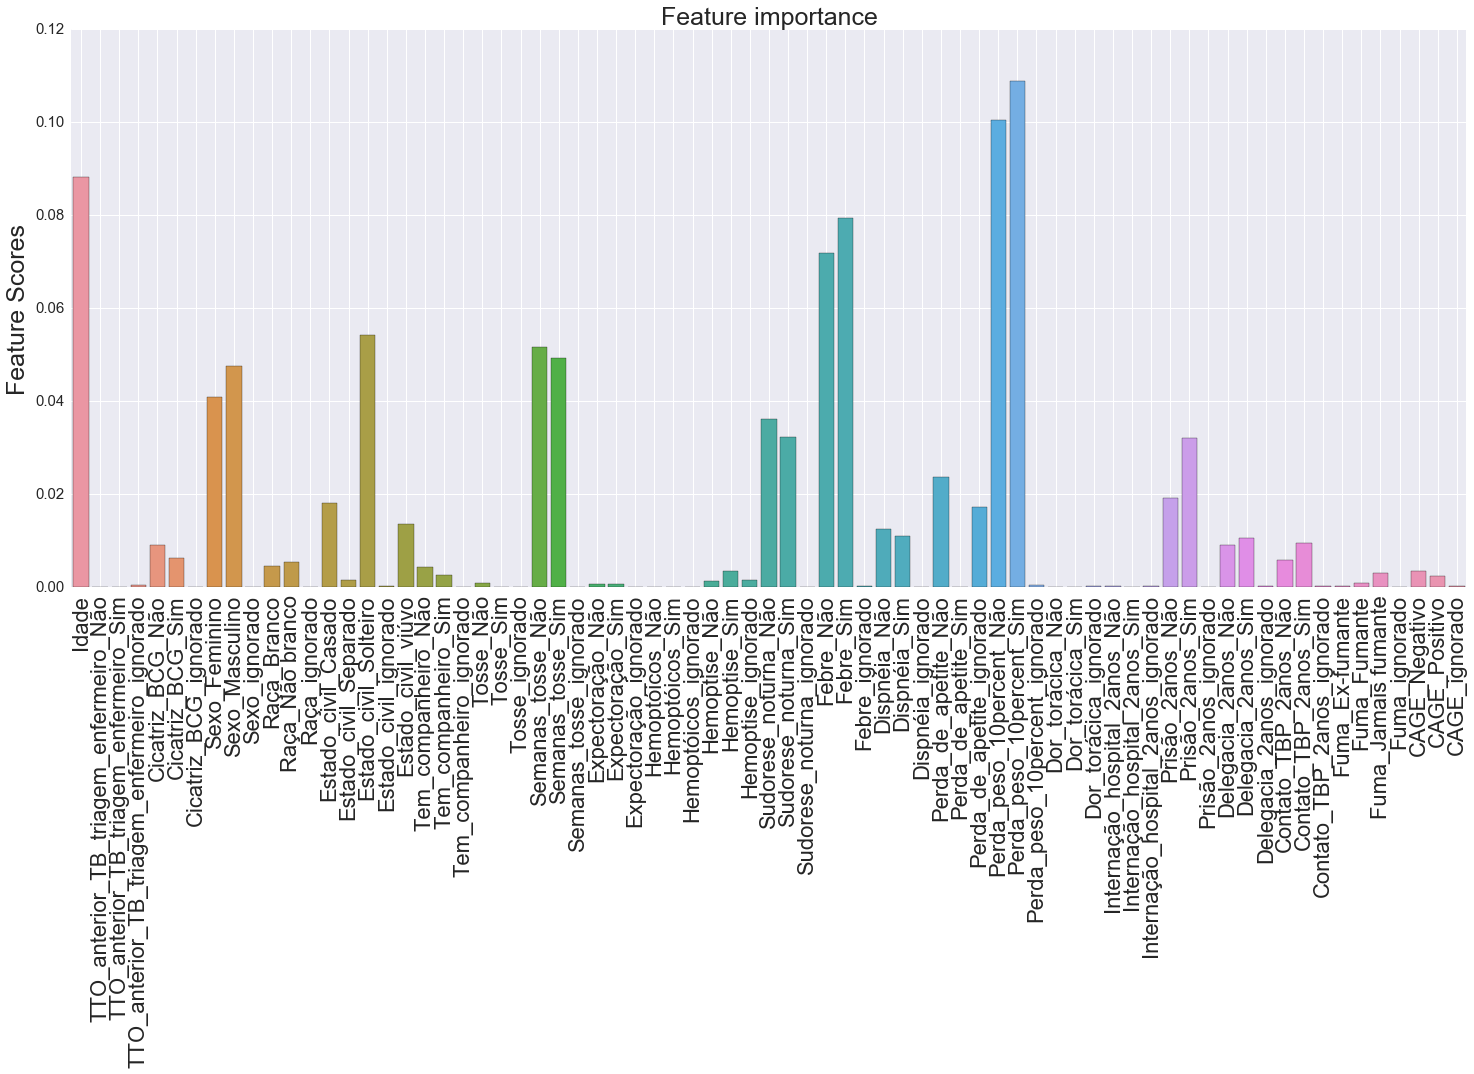

In [9]:
# Plotting
valores = zip(list(X.columns),clf.feature_importances_) 
plt.figure(figsize=(25,10))
sns.barplot(*zip(*valores))
plt.xticks(rotation=90,fontsize=22)
plt.yticks(fontsize=15)
plt.title('Feature importance',fontsize=25)
plt.ylabel('Feature Scores',fontsize=25)
plt.grid(True)
plt.show()

In [10]:
array = (clf.feature_importances_).tolist()

In [11]:
best = sorted(clf.feature_importances_)

In [12]:
best = (best[::-1])

In [13]:
features_full = []

for rank in best:
    features_full.append(X.columns[array.index(rank)])

In [20]:
features_full

['Perda_peso_10percent_Sim',
 'Perda_peso_10percent_Não',
 'Idade',
 'Febre_Sim',
 'Febre_Não',
 'Estado_civil_Solteiro',
 'Semanas_tosse_Não',
 'Semanas_tosse_Sim',
 'Sexo_Masculino',
 'Sexo_Feminino',
 'Sudorese_noturna_Não',
 'Sudorese_noturna_Sim',
 'Prisão_2anos_Sim',
 'Perda_de_apetite_Não',
 'Prisão_2anos_Não',
 'Estado_civil_Casado',
 'Perda_de_apetite_ignorado',
 'Estado_civil_viúvo',
 'Dispnéia_Não',
 'Dispnéia_Sim',
 'Delegacia_2anos_Sim',
 'Contato_TBP_2anos_Sim',
 'Delegacia_2anos_Não',
 'Cicatriz_BCG_Não',
 'Cicatriz_BCG_Sim',
 'Contato_TBP_2anos_Não',
 'Raça_Não branco',
 'Raça_Branco',
 'Tem_companheiro_Não',
 'Hemoptise_Sim',
 'Hemoptise_Sim',
 'Fuma_Jamais fumante',
 'Tem_companheiro_Sim',
 'CAGE_Positivo',
 'Estado_civil_Separado',
 'Estado_civil_Separado',
 'Hemoptise_Não',
 'Tosse_Não',
 'Tosse_Não',
 'Expectoração_Sim',
 'Expectoração_Não',
 'Perda_peso_10percent_ignorado',
 'TTO_anterior_TB_triagem_enfermeiro_ignorado',
 'Febre_ignorado',
 'Febre_ignorado',
 'Feb

In [14]:
for i in range(len(features_full)):
    print(features_full[i],best[i])

Perda_peso_10percent_Sim 0.1088
Perda_peso_10percent_Não 0.1004
Idade 0.0882
Febre_Sim 0.0794
Febre_Não 0.0718
Estado_civil_Solteiro 0.0543
Semanas_tosse_Não 0.0516
Semanas_tosse_Sim 0.0494
Sexo_Masculino 0.0476
Sexo_Feminino 0.0409
Sudorese_noturna_Não 0.0363
Sudorese_noturna_Sim 0.0323
Prisão_2anos_Sim 0.032
Perda_de_apetite_Não 0.0238
Prisão_2anos_Não 0.0193
Estado_civil_Casado 0.0182
Perda_de_apetite_ignorado 0.0172
Estado_civil_viúvo 0.0136
Dispnéia_Não 0.0125
Dispnéia_Sim 0.011
Delegacia_2anos_Sim 0.0105
Contato_TBP_2anos_Sim 0.0096
Delegacia_2anos_Não 0.0092
Cicatriz_BCG_Não 0.009
Cicatriz_BCG_Sim 0.0062
Contato_TBP_2anos_Não 0.0058
Raça_Não branco 0.0054
Raça_Branco 0.0045
Tem_companheiro_Não 0.0043
Hemoptise_Sim 0.0035
Hemoptise_Sim 0.0035
Fuma_Jamais fumante 0.0031
Tem_companheiro_Sim 0.0026
CAGE_Positivo 0.0024
Estado_civil_Separado 0.0015
Estado_civil_Separado 0.0015
Hemoptise_Não 0.0013
Tosse_Não 0.0009
Tosse_Não 0.0009
Expectoração_Sim 0.0008
Expectoração_Não 0.0007
Perda

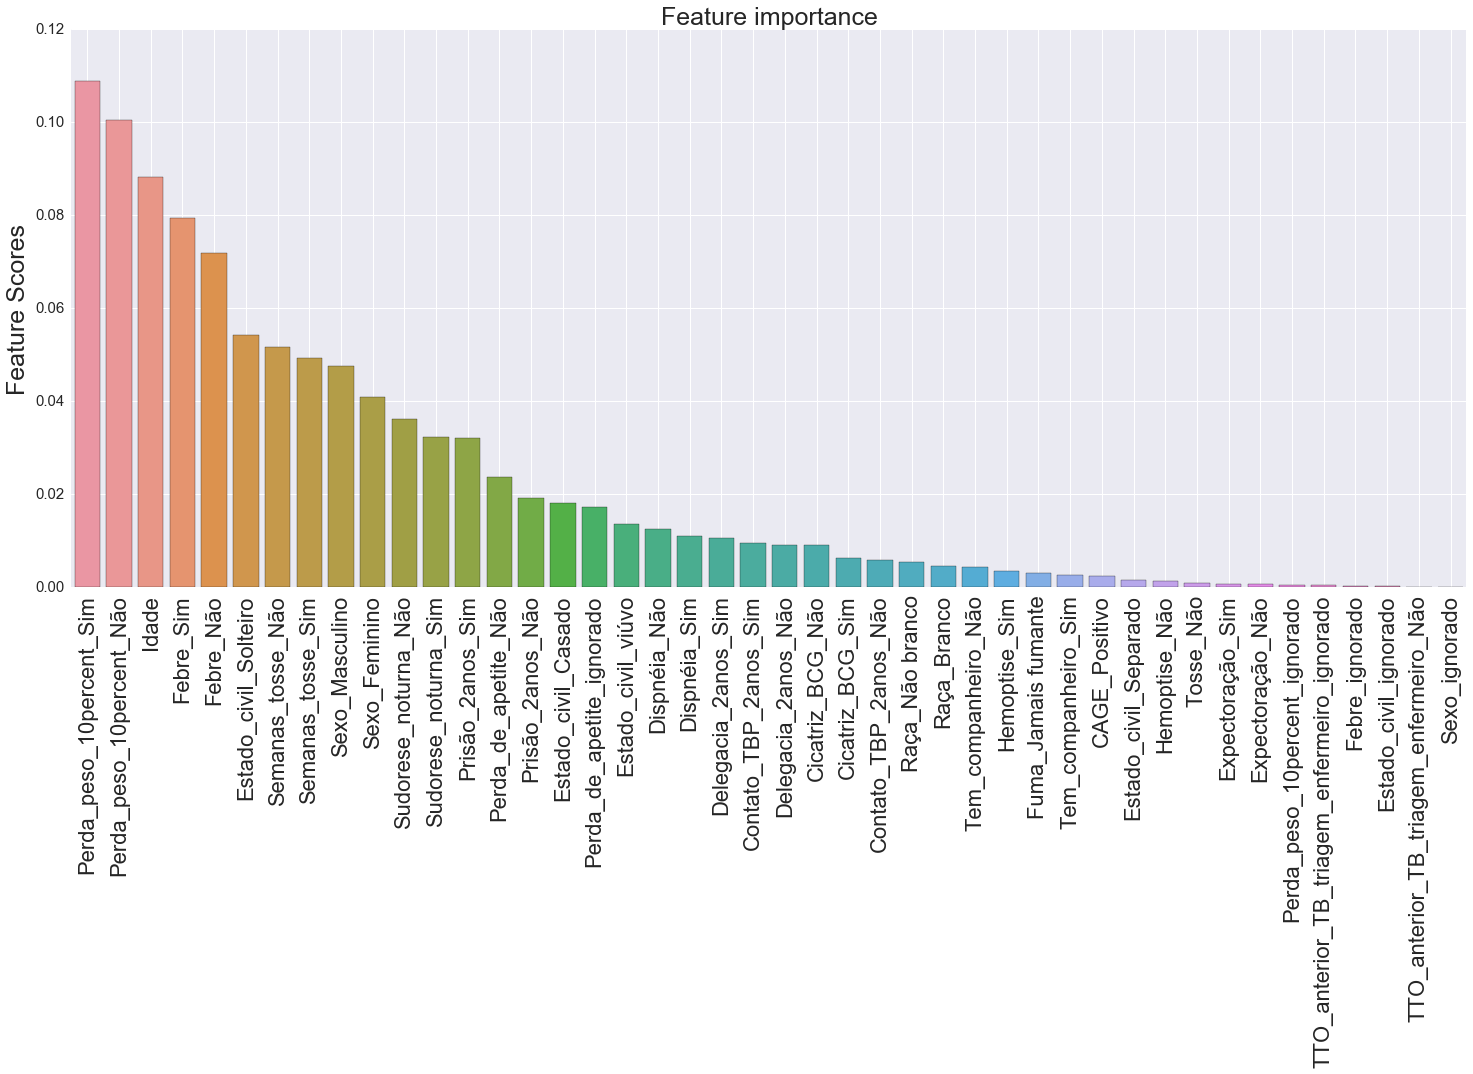

In [15]:
# Plotting
valores = zip(features_full,best) 
plt.figure(figsize=(25,10))
sns.barplot(*zip(*valores))
plt.xticks(rotation=90,fontsize=22)
plt.yticks(fontsize=15)
plt.title('Feature importance',fontsize=25)
plt.ylabel('Feature Scores',fontsize=25)
plt.grid(True)
plt.show()

In [16]:
cumsum = np.cumsum(best)

In [17]:
for i in range(len(features_full)):
    print(features_full[i],cumsum[i])

Perda_peso_10percent_Sim 0.1088
Perda_peso_10percent_Não 0.2092
Idade 0.2974
Febre_Sim 0.3768
Febre_Não 0.4486
Estado_civil_Solteiro 0.5029
Semanas_tosse_Não 0.5545
Semanas_tosse_Sim 0.6039
Sexo_Masculino 0.6515
Sexo_Feminino 0.6924
Sudorese_noturna_Não 0.7287
Sudorese_noturna_Sim 0.761
Prisão_2anos_Sim 0.793
Perda_de_apetite_Não 0.8168
Prisão_2anos_Não 0.8361
Estado_civil_Casado 0.8543
Perda_de_apetite_ignorado 0.8715
Estado_civil_viúvo 0.8851
Dispnéia_Não 0.8976
Dispnéia_Sim 0.9086
Delegacia_2anos_Sim 0.9191
Contato_TBP_2anos_Sim 0.9287
Delegacia_2anos_Não 0.9379
Cicatriz_BCG_Não 0.9469
Cicatriz_BCG_Sim 0.9531
Contato_TBP_2anos_Não 0.9589
Raça_Não branco 0.9643
Raça_Branco 0.9688
Tem_companheiro_Não 0.9731
Hemoptise_Sim 0.9766
Hemoptise_Sim 0.9801
Fuma_Jamais fumante 0.9832
Tem_companheiro_Sim 0.9858
CAGE_Positivo 0.9882
Estado_civil_Separado 0.9897
Estado_civil_Separado 0.9912
Hemoptise_Não 0.9925
Tosse_Não 0.9934
Tosse_Não 0.9943
Expectoração_Sim 0.9951
Expectoração_Não 0.9958
Perd

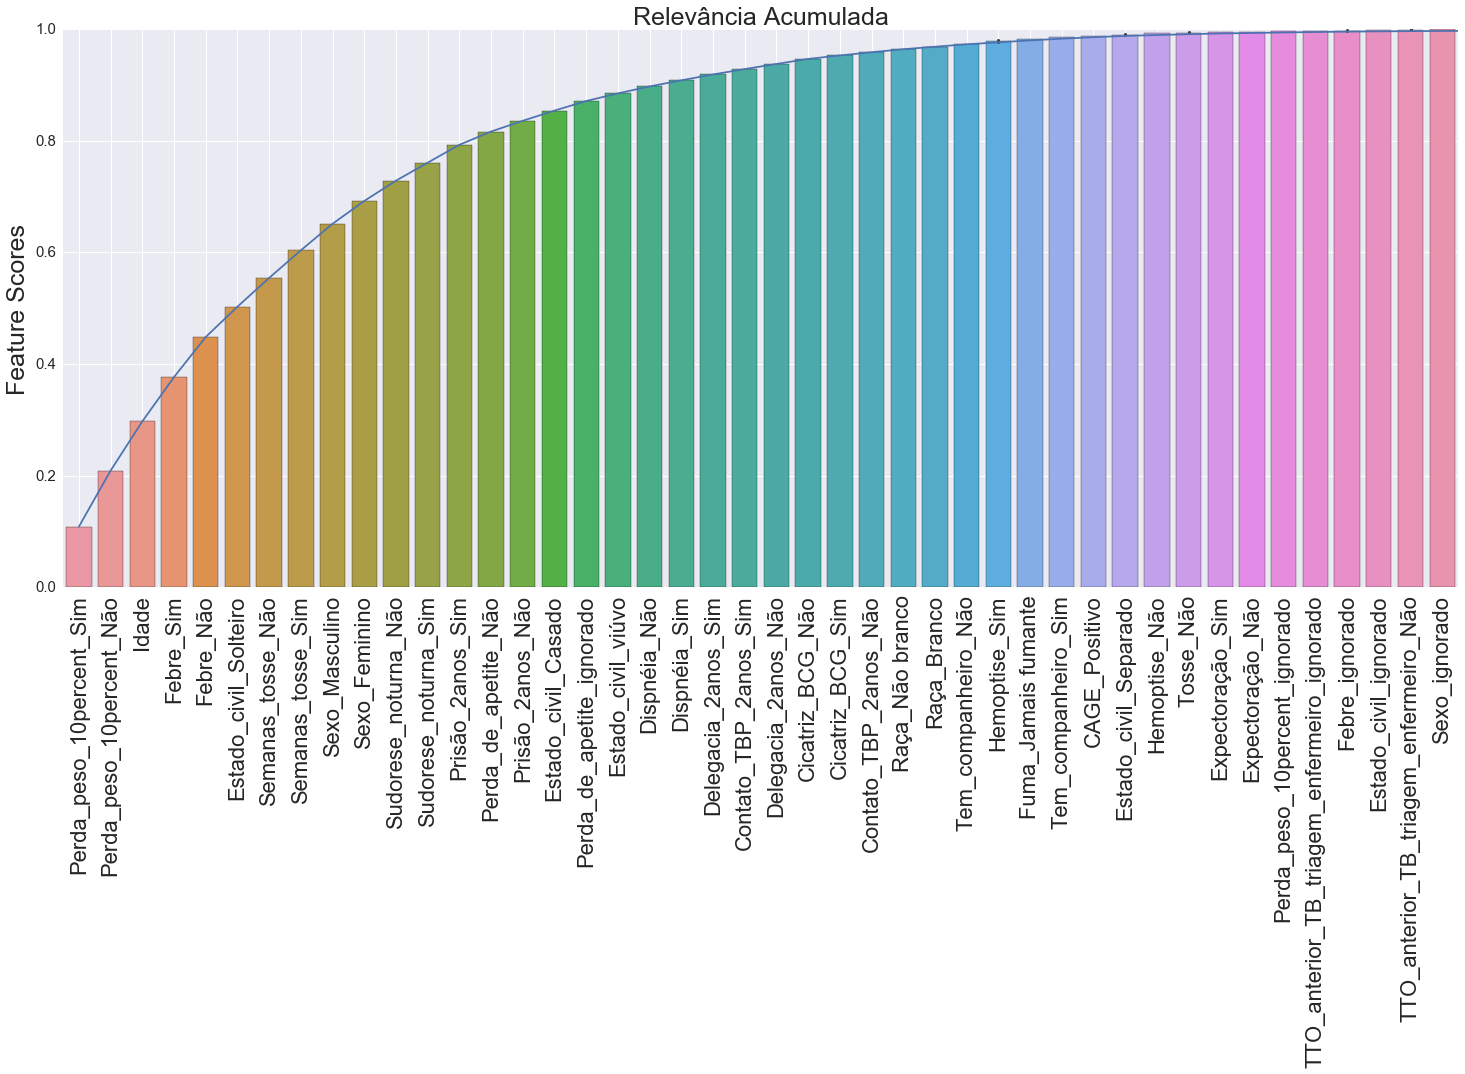

In [18]:
# Plotting
valores = zip(features_full,cumsum) 
plt.figure(figsize=(25,10))
sns.barplot(*zip(*valores))
plt.xticks(rotation=90,fontsize=22)
plt.yticks(fontsize=15)
plt.title('Relevância Acumulada',fontsize=25)
plt.ylabel('Feature Scores',fontsize=25)
plt.grid(True)
plt.hold(True)
plt.plot(cumsum)
plt.show()